In [1]:
# Importing Libraries  
import geopandas as gpd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import numpy as np
import plotly.express as px 
import plotly.graph_objects as go  
from plotly.subplots import make_subplots
import plotly.offline as py 
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor  
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score, KFold, train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

plt.style.use('seaborn-dark')  
plt.figure(facecolor='lightgrey')  
sns.set_style('darkgrid')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25572\1854456103.py:28: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Figure size 640x480 with 0 Axes>

In [2]:
df=pd.read_csv('undernourishment.csv')
df.columns

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'Value'], dtype='object')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.rename(columns={'Area': 'Country'})
df.columns

Index(['Country', 'Item', 'Year', 'Value'], dtype='object')

In [4]:
df['Item'].unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)',
       'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Percentage of population using safely managed drinking water services (percent)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Prevalence of anemia among women of reproductive age (15-49 y

In [5]:
df['Value'].unique()

array(['87', '88', '91', ..., '3413', '3082.9', '3276.3'], dtype=object)

In [6]:
# Function to clean values
def clean_values(val):
    if isinstance(val, str) and '<' in val:
        # Strip '<' and convert to float
        return float(val.replace('<', '').strip())
    return val

# Apply the cleaning function to the 'Value' column
df['Value'] = df['Value'].apply(clean_values)

# Convert the cleaned values to numeric (coerce non-convertible values to NaN)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Now apply the pivot_table operation
df = df.pivot_table(index=['Country', 'Year'], columns='Item', values='Value')

# Reset the index to make "Country" and "Year" regular columns
df = df.reset_index()

In [7]:
# Define a dictionary to map the original names to the brief names
renamed_columns = {
    'Average dietary energy supply adequacy (percent) (3-year average)': 'Energy supply adequacy (%)',
    'Dietary energy supply used in the estimation of prevalence of undernourishment (kcal/cap/day) (3-year average)': 'Energy supply (kcal/cap/day)',
    'Share of dietary energy supply derived from cereals, roots and tubers (percent) (3-year average)': 'Energy from cereals (%)',
    'Average protein supply (g/cap/day) (3-year average)': 'Protein supply (g/cap/day)',
    'Average supply of protein of animal origin (g/cap/day) (3-year average)': 'Animal protein supply (g/cap/day)',
    'Gross domestic product per capita, PPP, (constant 2017 international $)': 'GDP per capita (PPP)',
    'Prevalence of undernourishment (percent) (3-year average)': 'Undernourishment (%)',
    'Prevalence of severe food insecurity in the total population (percent) (3-year average)': 'Severe food insecurity (%)',
    'Cereal import dependency ratio (percent) (3-year average)': 'Cereal import dependency (%)',
    'Percentage of population using safely managed drinking water services (percent)': 'Safe drinking water (%)',
    'Percentage of children under 5 years affected by wasting (percent)': 'Child wasting (%)',
    'Prevalence of anemia among women of reproductive age (15-49 years) (percent)': 'Anemia in women (%)',
    'Minimum dietary energy requirement  (kcal/cap/day)': 'Min dietary energy req (kcal/cap/day)'
}

# Rename the columns
df = df.rename(columns=renamed_columns)
print(df.head())

Item      Country       Year  Energy supply adequacy (%)  \
0     Afghanistan       2000                         NaN   
1     Afghanistan  2000-2002                        87.0   
2     Afghanistan       2001                         NaN   
3     Afghanistan  2001-2003                        88.0   
4     Afghanistan       2002                         NaN   

Item  Protein supply (g/cap/day)  Animal protein supply (g/cap/day)  \
0                            NaN                                NaN   
1                           51.9                               13.4   
2                            NaN                                NaN   
3                           52.5                               12.9   
4                            NaN                                NaN   

Item  Cereal import dependency (%)  Energy supply (kcal/cap/day)  \
0                              NaN                           NaN   
1                             34.1                        1762.0   
2       

In [8]:
df.describe()

Item   Energy supply adequacy (%)  Protein supply (g/cap/day)  \
count                 3809.000000                 3578.000000   
mean                   119.508532                   81.683147   
std                     14.886757                   21.935218   
min                     71.000000                   29.600000   
25%                    109.000000                   63.200000   
50%                    120.000000                   80.600000   
75%                    131.000000                   98.000000   
max                    161.000000                  152.400000   

Item   Animal protein supply (g/cap/day)  Cereal import dependency (%)  \
count                        3578.000000                   3350.000000   
mean                           37.455729                     31.964567   
std                            21.334991                     63.936406   
min                             2.500000                   -654.800000   
25%                            18.500000                      7.700000   
50%                            34.800000                     38.450000   
75%                            54.375000                     76.600000   
max                           111.900000                    100.000000   

Item   Energy supply (kcal/cap/day)  GDP per capita (PPP)  \
count                   3795.000000           4330.000000   
mean                    2828.957312          22514.939861   
std                      461.354294          24629.399779   
min                     1542.000000            726.400000   
25%                     2472.500000           4666.100000   
50%                     2835.000000          13477.750000   
75%                     3188.500000          32569.150000   
max                     3917.000000         173906.000000   

Item   Min dietary energy req (kcal/cap/day)  Child wasting (%)  \
count                            4632.000000         760.000000   
mean                             1823.031088           6.125000   
std                               100.787428           4.459749   
min                              1580.000000           0.000000   
25%                              1737.000000           2.500000   
50%                              1824.000000           5.200000   
75%                              1913.000000           8.925000   
max                              2159.000000          24.600000   

Item   Safe drinking water (%)  Anemia in women (%)  \
count              2947.000000          3840.000000   
mean                 66.248728            28.047057   
std                  31.107999            13.311676   
min                   1.000000             7.300000   
25%                  42.000000            17.900000   
50%                  75.000000            26.300000   
75%                  96.000000            35.700000   
max                  99.000000            66.100000   

Item   Severe food insecurity (%)  Undernourishment (%)  \
count                 1015.000000           3793.000000   
mean                     9.527291             11.009676   
std                     11.668696             11.226431   
min                      0.500000              2.500000   
25%                      1.500000              2.500000   
50%                      4.800000              6.200000   
75%                     13.000000             15.700000   
max                     65.400000             71.400000   

Item   Energy from cereals (%)  
count              3578.000000  
mean                 47.045836  
std                  14.439393  
min                  22.000000  
25%                  35.000000  
50%                  46.000000  
75%                  58.000000  
max                  84.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8891 entries, 0 to 8890
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Country                                8891 non-null   object 
 1   Year                                   8891 non-null   object 
 2   Energy supply adequacy (%)             3809 non-null   float64
 3   Protein supply (g/cap/day)             3578 non-null   float64
 4   Animal protein supply (g/cap/day)      3578 non-null   float64
 5   Cereal import dependency (%)           3350 non-null   float64
 6   Energy supply (kcal/cap/day)           3795 non-null   float64
 7   GDP per capita (PPP)                   4330 non-null   float64
 8   Min dietary energy req (kcal/cap/day)  4632 non-null   float64
 9   Child wasting (%)                      760 non-null    float64
 10  Safe drinking water (%)                2947 non-null   float64
 11  Anem

In [10]:
df['Year'].unique()

array(['2000', '2000-2002', '2001', '2001-2003', '2002', '2002-2004',
       '2003', '2003-2005', '2004', '2004-2006', '2005', '2005-2007',
       '2006', '2006-2008', '2007', '2007-2009', '2008', '2008-2010',
       '2009', '2009-2011', '2010', '2010-2012', '2011', '2011-2013',
       '2012', '2012-2014', '2013', '2013-2015', '2014', '2014-2016',
       '2015', '2015-2017', '2016', '2016-2018', '2017', '2017-2019',
       '2018', '2018-2020', '2019', '2019-2021', '2020', '2020-2022',
       '2021', '2021-2023', '2022', '2023'], dtype=object)

In [11]:
# Function to clean the 'Year' column
def clean_year(year):
    # If the value is a range, calculate the middle year
    if '-' in year:
        start_year, end_year = map(int, year.split('-'))
        return (start_year + end_year) // 2
    # If it's a single year, convert to integer
    return int(year)

# Apply the function to the 'Year' column
df['Year'] = df['Year'].apply(clean_year)
df = df[df['Year'] != 2023]
# Display unique years after cleaning
print(df['Year'].unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [12]:
df = df.drop_duplicates(subset=['Country', 'Year'])

In [13]:
df.duplicated().sum()

0

In [14]:
df.to_csv('pivot_undernou.csv')

In [15]:
df.dtypes

Item
Country                                   object
Year                                       int64
Energy supply adequacy (%)               float64
Protein supply (g/cap/day)               float64
Animal protein supply (g/cap/day)        float64
Cereal import dependency (%)             float64
Energy supply (kcal/cap/day)             float64
GDP per capita (PPP)                     float64
Min dietary energy req (kcal/cap/day)    float64
Child wasting (%)                        float64
Safe drinking water (%)                  float64
Anemia in women (%)                      float64
Severe food insecurity (%)               float64
Undernourishment (%)                     float64
Energy from cereals (%)                  float64
dtype: object

In [16]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR',
       'China, Taiwan Province of', 'China, mainland', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
      

In [17]:
df.isna().sum()

Item
Country                                     0
Year                                        0
Energy supply adequacy (%)                855
Protein supply (g/cap/day)               1086
Animal protein supply (g/cap/day)        1086
Cereal import dependency (%)             1314
Energy supply (kcal/cap/day)              869
GDP per capita (PPP)                     4157
Min dietary energy req (kcal/cap/day)    4229
Child wasting (%)                        4587
Safe drinking water (%)                  4309
Anemia in women (%)                      4127
Severe food insecurity (%)               3649
Undernourishment (%)                      871
Energy from cereals (%)                  1086
dtype: int64

In [18]:
# List of columns to drop
columns_to_drop = [
    'Min dietary energy req (kcal/cap/day)',
    'GDP per capita (PPP)',
    'Child wasting (%)',
    'Safe drinking water (%)',
    'Anemia in women (%)',
    'Severe food insecurity (%)'
]

df = df.drop(columns=columns_to_drop)
print(df.head())

Item      Country  Year  Energy supply adequacy (%)  \
0     Afghanistan  2000                         NaN   
1     Afghanistan  2001                        87.0   
3     Afghanistan  2002                        88.0   
5     Afghanistan  2003                        91.0   
7     Afghanistan  2004                        92.0   

Item  Protein supply (g/cap/day)  Animal protein supply (g/cap/day)  \
0                            NaN                                NaN   
1                           51.9                               13.4   
3                           52.5                               12.9   
5                           54.4                               13.6   
7                           54.4                               13.2   

Item  Cereal import dependency (%)  Energy supply (kcal/cap/day)  \
0                              NaN                           NaN   
1                             34.1                        1762.0   
3                             29.3    

In [19]:
df.isna().sum()

Item
Country                                 0
Year                                    0
Energy supply adequacy (%)            855
Protein supply (g/cap/day)           1086
Animal protein supply (g/cap/day)    1086
Cereal import dependency (%)         1314
Energy supply (kcal/cap/day)          869
Undernourishment (%)                  871
Energy from cereals (%)              1086
dtype: int64

### countries for which there are no records of the Undernourishment (%)

In [20]:
countries_with_null_Energy_supply = df.groupby('Country').filter(lambda x: x['Undernourishment (%)'].isnull().all())
unique_countries = countries_with_null_Energy_supply['Country'].unique()
print(unique_countries)

['American Samoa' 'Andorra' 'Antigua and Barbuda' 'Bahamas' 'Bahrain'
 'Bermuda' 'Bhutan' 'Brunei Darussalam' 'Burundi' 'Cook Islands'
 'Equatorial Guinea' 'Eritrea' 'Greenland' 'Grenada' 'Lesotho' 'Maldives'
 'Marshall Islands' 'Micronesia (Federated States of)' 'Nauru' 'Niue'
 'Palau' 'Palestine' 'Puerto Rico' 'Qatar' 'Saint Kitts and Nevis'
 'Saint Lucia' 'Singapore' 'Tonga' 'Tuvalu']


In [21]:
# Remove these countries from the original DataFrame
df = df[~df['Country'].isin(unique_countries)]
df['Undernourishment (%)'].isna().sum()

209

In [22]:
df[df['Undernourishment (%)'].isna()]

Item                             Country  Year  Energy supply adequacy (%)  \
0                            Afghanistan  2000                         NaN   
46                               Albania  2000                         NaN   
92                               Algeria  2000                         NaN   
183                               Angola  2000                         NaN   
275                            Argentina  2000                         NaN   
...                                  ...   ...                         ...   
8661  Venezuela (Bolivarian Republic of)  2000                         NaN   
8707                            Viet Nam  2000                         NaN   
8753                               Yemen  2000                         NaN   
8799                              Zambia  2000                         NaN   
8845                            Zimbabwe  2000                         NaN   

Item  Protein supply (g/cap/day)  Animal protein supply (g/cap/day)  \
0                            NaN                                NaN   
46                           NaN                                NaN   
92                           NaN                                NaN   
183                          NaN                                NaN   
275                          NaN                                NaN   
...                          ...                                ...   
8661                         NaN                                NaN   
8707                         NaN                                NaN   
8753                         NaN                                NaN   
8799                         NaN                                NaN   
8845                         NaN                                NaN   

Item  Cereal import dependency (%)  Energy supply (kcal/cap/day)  \
0                              NaN                           NaN   
46                             NaN                           NaN   
92                             NaN                           NaN   
183                            NaN                           NaN   
275                            NaN                           NaN   
...                            ...                           ...   
8661                           NaN                           NaN   
8707                           NaN                           NaN   
8753                           NaN                           NaN   
8799                           NaN                           NaN   
8845                           NaN                           NaN   

Item  Undernourishment (%)  Energy from cereals (%)  
0                      NaN                      NaN  
46                     NaN                      NaN  
92                     NaN                      NaN  
183                    NaN                      NaN  
275                    NaN                      NaN  
...                    ...                      ...  
8661                   NaN                      NaN  
8707                   NaN                      NaN  
8753                   NaN                      NaN  
8799                   NaN                      NaN  
8845                   NaN                      NaN  

[209 rows x 9 columns]

In [23]:
df.tail()

Item   Country  Year  Energy supply adequacy (%)  Protein supply (g/cap/day)  \
8880  Zimbabwe  2018                        92.0                        55.0   
8882  Zimbabwe  2019                        91.0                        55.4   
8884  Zimbabwe  2020                        91.0                        56.4   
8886  Zimbabwe  2021                        90.0                        57.3   
8888  Zimbabwe  2022                        90.0                         NaN   

Item  Animal protein supply (g/cap/day)  Cereal import dependency (%)  \
8880                               26.0                          38.5   
8882                               26.6                          43.1   
8884                               28.2                          44.1   
8886                               29.9                          33.5   
8888                                NaN                           NaN   

Item  Energy supply (kcal/cap/day)  Undernourishment (%)  \
8880                        2048.0                  38.7   
8882                        2037.0                  39.4   
8884                        2034.0                  39.5   
8886                        2039.0                  38.9   
8888                        2043.0                  38.1   

Item  Energy from cereals (%)  
8880                     54.0  
8882                     54.0  
8884                     53.0  
8886                     51.0  
8888                      NaN

The null values in the dataset, particularly for the years 2000 and 2023, are caused by the function that determines date intervals. This function creates gaps at the start and end of the observed period, resulting in missing data for these specific years. These nulls are not actual data absences but are a byproduct of the interval-based processing.

To address this, we can use a method like backward filling (bfill) to fill the nulls with the next valid value, ensuring data continuity.

In [24]:
# Fill NaN values with the next valid value in the column
df['Undernourishment (%)'] = df['Undernourishment (%)'].fillna(method='bfill')
df['Energy supply adequacy (%)'] = df['Energy supply adequacy (%)'].fillna(method='bfill')
df['Energy supply (kcal/cap/day)'] = df['Energy supply (kcal/cap/day)'].fillna(method='bfill')
df['Protein supply (g/cap/day)'] = df['Protein supply (g/cap/day)'].fillna(method='bfill')
df['Animal protein supply (g/cap/day)'] = df['Animal protein supply (g/cap/day)'].fillna(method='bfill')
df['Cereal import dependency (%)'] = df['Cereal import dependency (%)'].fillna(method='bfill')
df['Energy from cereals (%)'] = df['Energy from cereals (%)'].fillna(method='bfill')
df.loc[8888] = df.loc[8888].fillna(df.loc[8886])  # Fill with Zimbabwe 2021 data

df['Undernourishment (%)'].isna().sum()

0

In [25]:
df.isna().sum()

Item
Country                              0
Year                                 0
Energy supply adequacy (%)           0
Protein supply (g/cap/day)           0
Animal protein supply (g/cap/day)    0
Cereal import dependency (%)         0
Energy supply (kcal/cap/day)         0
Undernourishment (%)                 0
Energy from cereals (%)              0
dtype: int64

### Top 10 Countries with Highest Undernourishment Rates

In [26]:
top_10 = df.groupby('Country')['Undernourishment (%)'].sum().nlargest(10).reset_index()
fig = px.bar(top_10, x='Country', y='Undernourishment (%)',
             title='Top 10 Countries with Highest Undernourishment Rates',
             template='plotly_dark')
fig.show()

The data reveals alarming undernourishment levels in these countries, with Somalia at a staggering 1477%, highlighting a severe food security crisis. Haiti follows with 1053.8%, indicating critical nutritional needs. Zambia (974.9%), North Korea (905.8%), and Rwanda (824.2%) also face significant challenges. The situation in Liberia (811.5%) and Sierra Leone (791.5%) reflects ongoing struggles for food security. Madagascar (772.3%), Mozambique (768.9%), and Zimbabwe (767.6%) further illustrate the pressing need for comprehensive strategies to address these critical issues and improve the wellbeing of their populations.

### Top 10 Countries with Lowest Undernourishment Rates

In [27]:
top_10 = df.groupby('Country')['Undernourishment (%)'].sum().nsmallest(15).reset_index()
fig = px.bar(top_10, x='Country', y='Undernourishment (%)',
             title='Top 15 Countries with Lowest Undernourishment Rates',
             template='plotly_dark')
fig.show()

This data highlights countries with the lowest levels of undernourishment, with Australia, Finland, Hungary, Ireland, Israel, Cuba, FRance, Germany, etc all reporting a rate of 57.7%. These figures reflect a relatively stable food security situation in these nations, indicating effective policies and systems to ensure nutritional access and overall health for their populations.

c:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



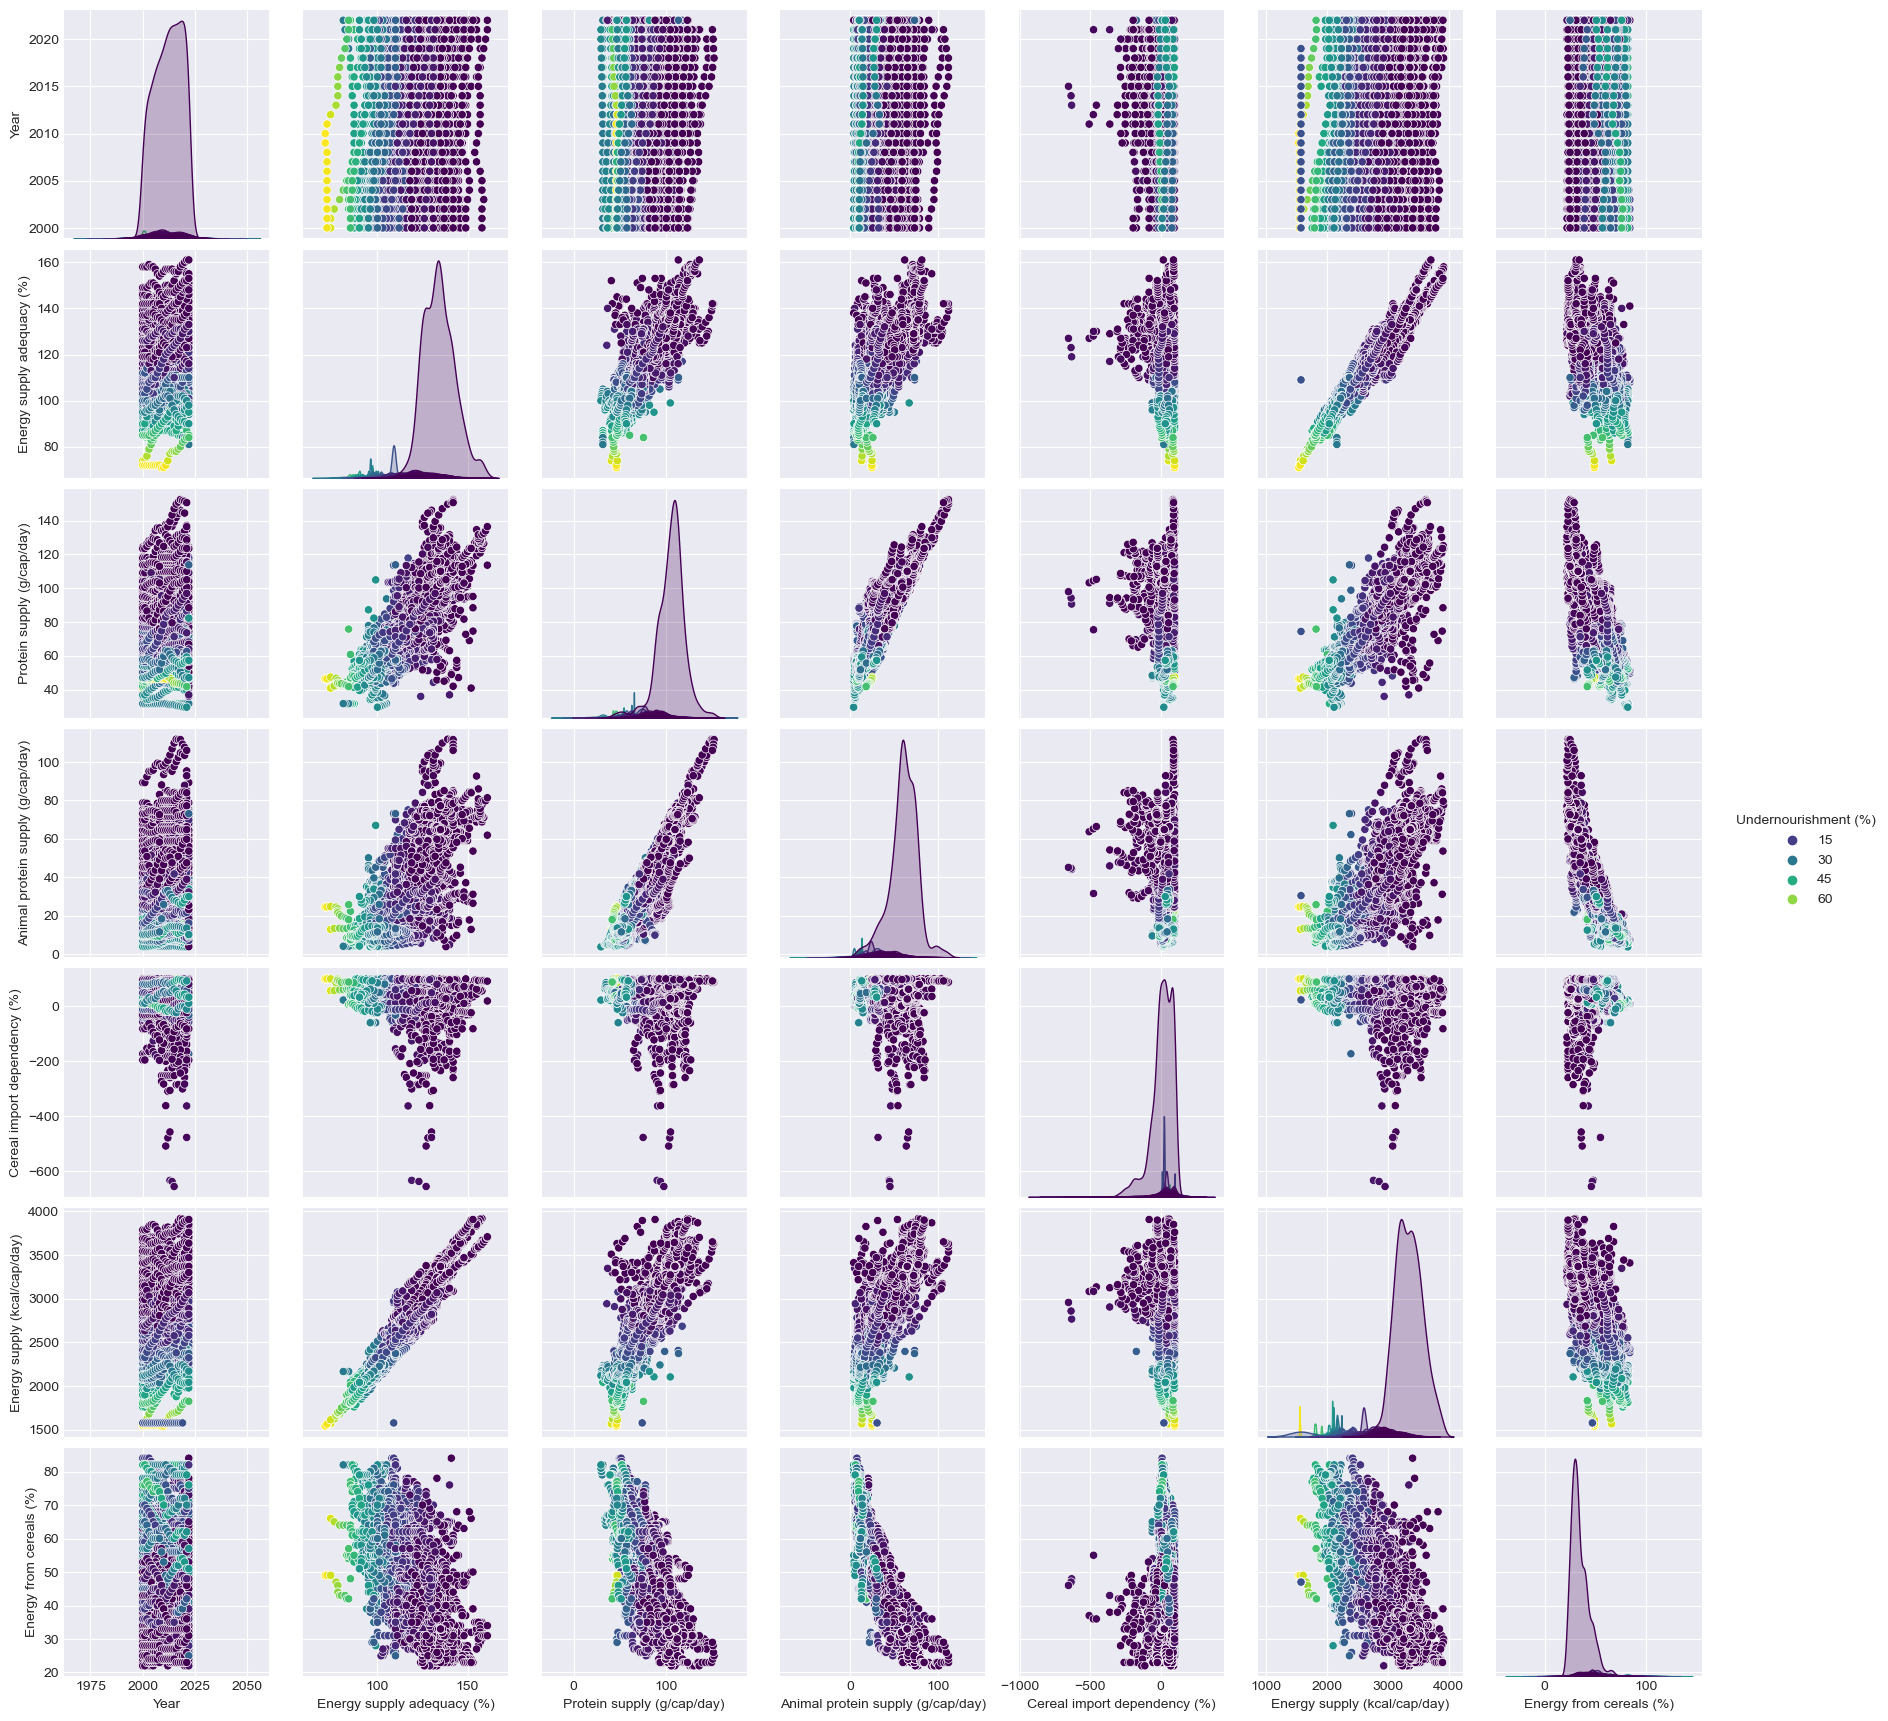

In [28]:
sns.pairplot(data=df, hue='Undernourishment (%)', kind='scatter', palette='viridis')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Energy supply adequacy (%)'}>,
        <Axes: title={'center': 'Protein supply (g/cap/day)'}>],
       [<Axes: title={'center': 'Animal protein supply (g/cap/day)'}>,
        <Axes: title={'center': 'Cereal import dependency (%)'}>,
        <Axes: title={'center': 'Energy supply (kcal/cap/day)'}>],
       [<Axes: title={'center': 'Undernourishment (%)'}>,
        <Axes: title={'center': 'Energy from cereals (%)'}>, <Axes: >]],
      dtype=object)

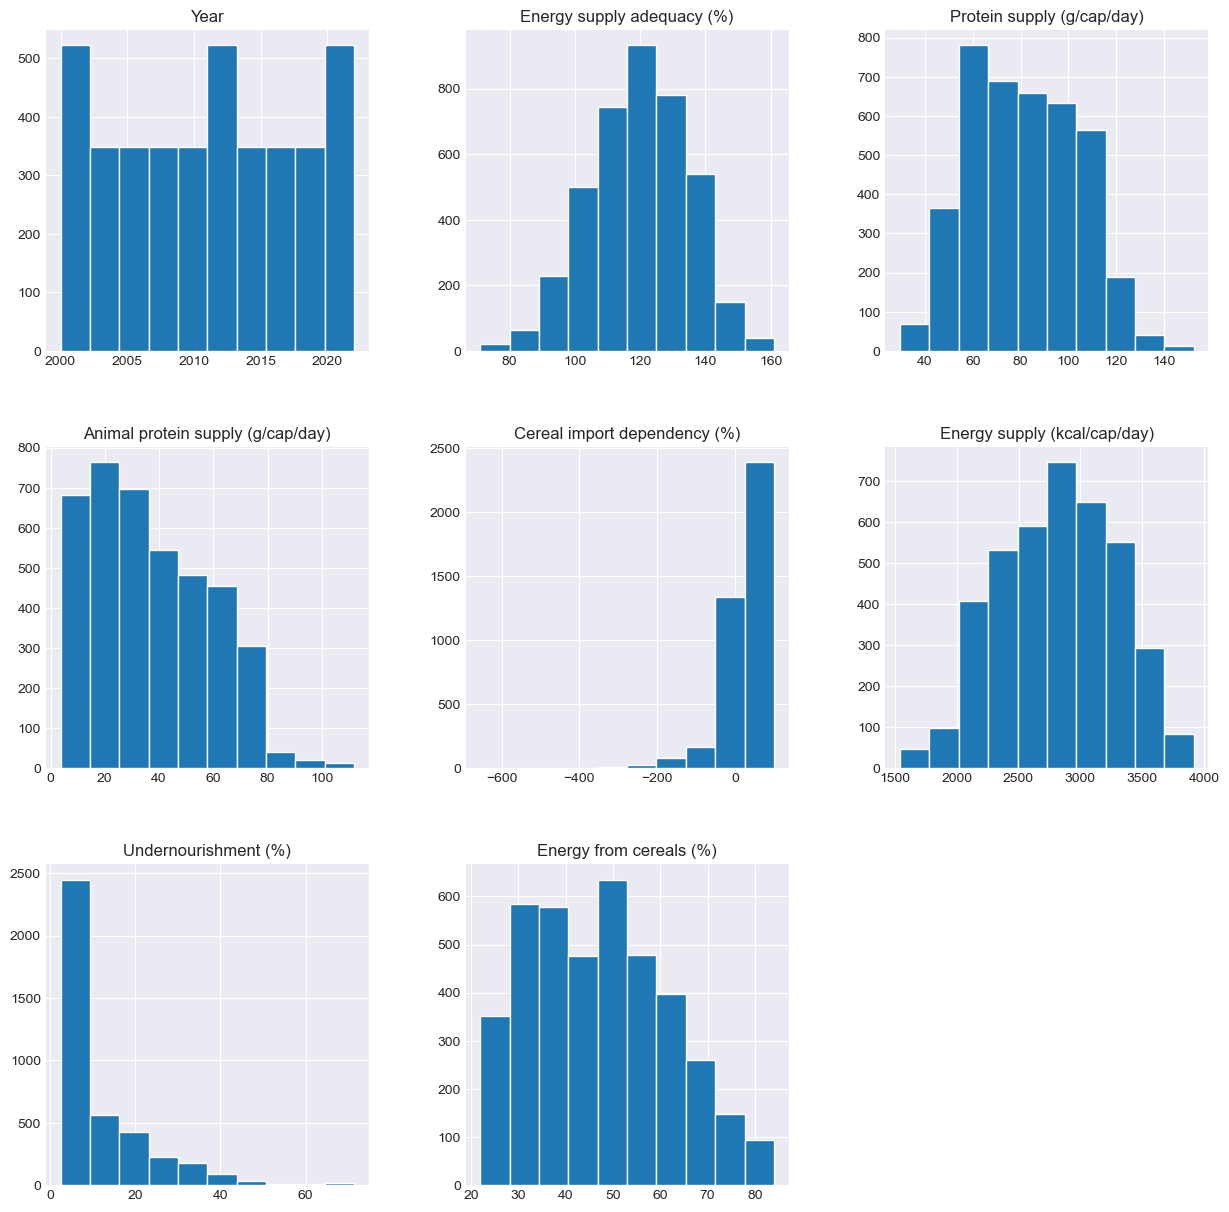

In [29]:
df.hist(figsize = (15, 15))

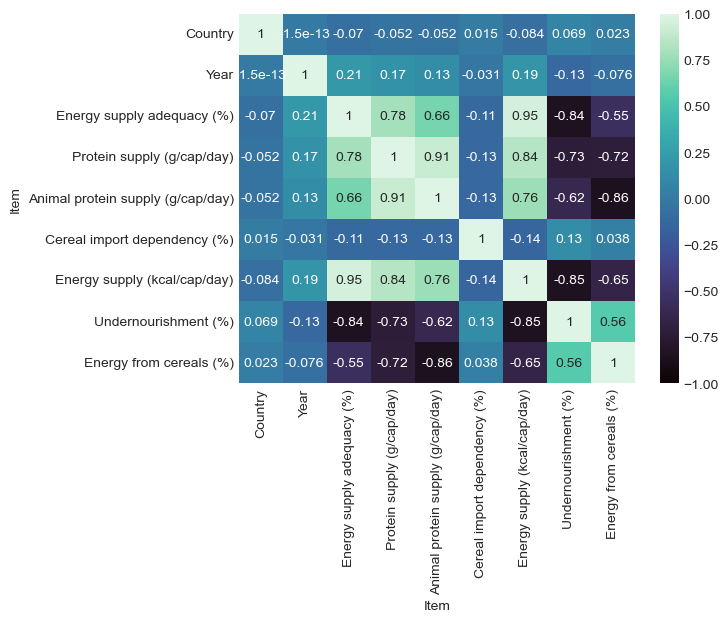

In [30]:
hm = df.copy()

cat_col = hm.select_dtypes(include = ['object']).columns.tolist()
label_encoder = LabelEncoder()

for col in cat_col :
    hm[col] = label_encoder.fit_transform(hm[col])

# Confusion Matrix 
cm = sns.heatmap(hm.corr(), annot = True, cmap='mako', vmin=-1, vmax=1)
plt.show()

* Protein Supply and Energy Supply: are strong positive correlations among protein supply, animal protein supply, and energy supply, indicating that higher protein and energy supplies are often associated with one another.
* Undernourishment: shows negative correlations with most of the supply metrics, suggesting that as energy and protein supplies increase, undernourishment tends to decrease.
* Cereal Import Dependency: has negative correlations with several supply metrics, indicating that countries more dependent on cereal imports may struggle with adequate energy and protein supply.

In [31]:
px.scatter(df, x = 'Undernourishment (%)', y = 'Energy supply adequacy (%)', color = 'Country', template = 'plotly_dark') 

In [32]:
px.scatter(df, x = 'Undernourishment (%)', y = 'Protein supply (g/cap/day)', color = 'Country', template = 'plotly_dark') 

In [33]:
px.scatter(df, x = 'Undernourishment (%)', y = 'Energy supply (kcal/cap/day)', color = 'Country', template = 'plotly_dark') 

In [34]:
px.scatter(df, x = 'Undernourishment (%)', y = 'Energy from cereals (%)', color = 'Country', template = 'plotly_dark') 

In [35]:
px.scatter(df, x = 'Undernourishment (%)', y = 'Cereal import dependency (%)', color = 'Country', template = 'plotly_dark') 

In [36]:
px.scatter(df, x = 'Undernourishment (%)', y = 'Animal protein supply (g/cap/day)', color = 'Country', template = 'plotly_dark') 

In [37]:
fig = px.box(df, x='Country', y='Undernourishment (%)', color='Country', 
             labels={'Undernourishment (%)': 'Undernourishment (%)', 'Country': 'Country'},
             template='plotly_dark', title='Undernourishment (%) Distribution Across Countries')
fig.show()

In [38]:
fig = px.choropleth(df, locations='Country', locationmode='country names', color='Undernourishment (%)',
                    hover_name='Country', title='Undernourishment (%)by Country',
                    color_continuous_scale=px.colors.sequential.Viridis, template='plotly_dark')
fig.show()

Energy supply adequacy (%)               1048
Protein supply (g/cap/day)               1279
Animal protein supply (g/cap/day)        1279
Cereal import dependency (%)             1507
Energy supply (kcal/cap/day)             1062
GDP per capita (PPP)                     4350
Min dietary energy req (kcal/cap/day)    4229
Child wasting (%)                        4779
Safe drinking water (%)                  4502
Anemia in women (%)                      4320
Severe food insecurity (%)               3842
Undernourishment (%)                     1064
Energy from cereals (%) 

In [39]:
fig = px.scatter(df, x='Energy supply adequacy (%)', y='Undernourishment (%)', color='Country', 
                 labels={'Energy supply adequacy (%)': 'Protein supply (g/cap/day)', 'Energy supply (kcal/cap/day)': 'Energy from cereals (%)'},
                 title='Energy supply adequacy (%) vs. Undernourishment (%)', template='plotly_dark')
fig.show()

In [40]:
fig = px.line(df.groupby('Year')['Undernourishment (%)'].mean().reset_index(),
              x='Year', y='Undernourishment (%)',
              title='Average Undernourishment Over Time with Annotations',
              template='plotly_dark')

fig.add_annotation(x=2010, y=15, text="Major Policy Change", showarrow=True, arrowhead=2)
fig.show()

In [41]:
fig2 = px.line(df.groupby(['Year'])['Energy supply adequacy (%)'].mean(), 
               labels = {'value' : 'Energy supply adequacy (%)'}, template = 'plotly_dark') 
fig2.show()

In [42]:
fig3 = px.line(df.groupby(['Year'])['Energy supply (kcal/cap/day)'].mean(), 
               labels = {'value' : 'Energy supply (kcal/cap/day)'}, template = 'plotly_dark') 
fig3.show()

In [43]:
fig = make_subplots(rows=3, cols=1, subplot_titles=('Undernourishment', 'Energy Supply Adequacy', 'Protein Supply'))

fig.add_trace(go.Scatter(x=df['Year'], y=df.groupby('Year')['Undernourishment (%)'].mean(), mode='lines', name='Undernourishment (%)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Year'], y=df.groupby('Year')['Energy supply adequacy (%)'].mean(), mode='lines', name='Energy Supply Adequacy (%)'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['Year'], y=df.groupby('Year')['Protein supply (g/cap/day)'].mean(), mode='lines', name='Protein Supply (g/cap/day)'), row=3, col=1)
fig.add_trace(go.Scatter(x=df['Year'], y=df.groupby('Year')['Energy from cereals (%)'].mean(), mode='lines', name='Energy from cereals (%)'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Year'], y=df.groupby('Year')['Animal protein supply (g/cap/day)'].mean(), mode='lines', name='Animal protein supply (g/cap/day)'), row=2, col=1)

fig.update_layout(title_text='Trends in Undernourishment and Related Metrics Over Time', template='plotly_dark')
fig.show()

In [44]:
selected_countries = df[df['Country'].isin(['Somalia', 'Haiti', 'Zambia', 'Australia', 'Finland', 'United States of America'])]
fig = px.bar(selected_countries, x='Country', y='Undernourishment (%)',
             title='Undernourishment Comparison: Selected Countries',
             template='plotly_dark')
fig.show()

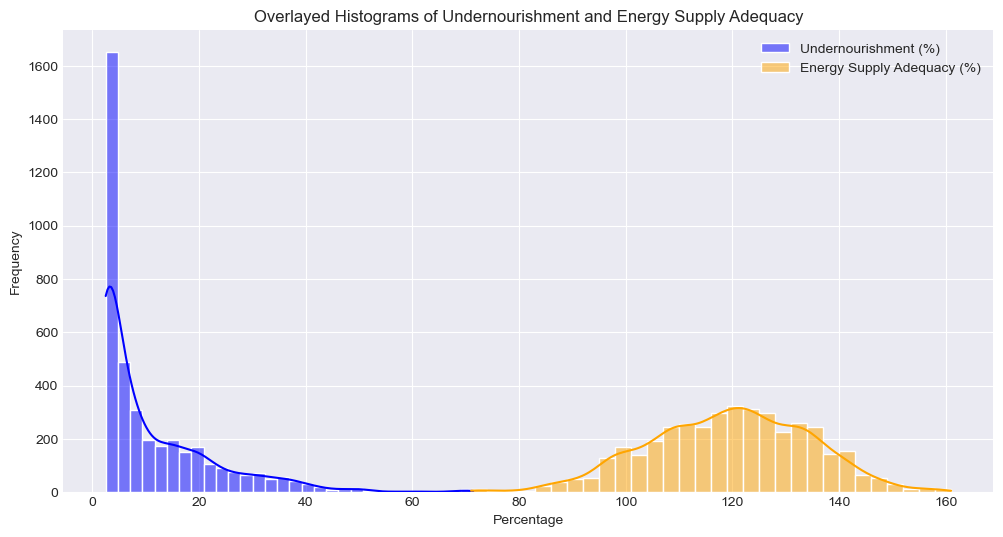

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Undernourishment (%)'], color='blue', label='Undernourishment (%)', kde=True, bins=30)
sns.histplot(df['Energy supply adequacy (%)'], color='orange', label='Energy Supply Adequacy (%)', kde=True, bins=30)
plt.legend()
plt.title('Overlayed Histograms of Undernourishment and Energy Supply Adequacy')
plt.xlabel('Percentage')
plt.ylabel('Frequency')
plt.show()

In [46]:
fig = px.bar(df, x='Country', y=['Energy supply adequacy (%)', 'Protein supply (g/cap/day)'],
             title='Comparison of Energy Supply and Protein Supply Across Countries',
             labels={'value': 'Percentage', 'variable': 'Metrics'},
             template='plotly_dark', barmode='stack')
fig.show()

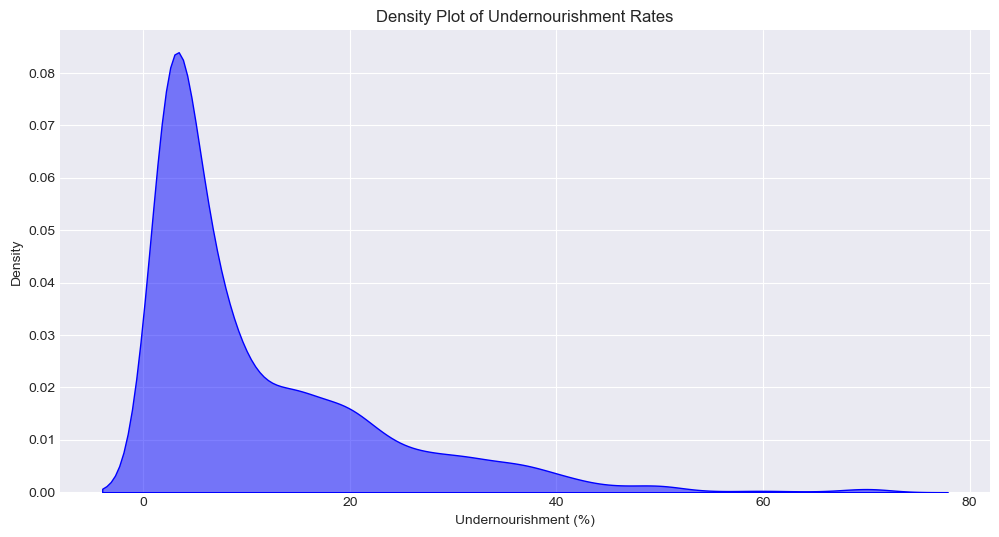

In [47]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Undernourishment (%)'], fill=True, color='blue', alpha=0.5)
plt.title('Density Plot of Undernourishment Rates')
plt.xlabel('Undernourishment (%)')
plt.ylabel('Density')
plt.show()

In [48]:
X = df.drop(labels = 'Undernourishment (%)', axis = 1)
y = df['Undernourishment (%)']

# Convert data into dummy variables 
X = pd.get_dummies(X)

In [49]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
X_train.head()

Year  Energy supply adequacy (%)  Protein supply (g/cap/day)  \
1066  2009                       132.0                        92.5   
7353  2009                       114.0                        56.3   
3458  2022                       131.0                        44.3   
1301  2000                       100.0                        53.8   
2634  2013                       115.0                        76.2   

      Animal protein supply (g/cap/day)  Cereal import dependency (%)  \
1066                               49.5                          -0.2   
7353                               17.0                          94.8   
3458                                8.3                          41.7   
1301                               15.7                           3.9   
2634                               30.2                          38.6   

      Energy supply (kcal/cap/day)  Energy from cereals (%)  \
1066                        3198.0                     34.0   
7353                        2455.0                     67.0   
3458                        2909.0                     70.0   
1301                        2197.0                     77.0   
2634                        2625.0                     47.0   

      Country_Afghanistan  Country_Albania  Country_Algeria  ...  \
1066                False            False            False  ...   
7353                False            False            False  ...   
3458                False            False            False  ...   
1301                False            False            False  ...   
2634                False            False            False  ...   

      Country_United Republic of Tanzania  Country_United States of America  \
1066                                False                             False   
7353                                False                             False   
3458                                False                             False   
1301                                False                             False   
2634                                False                             False   

      Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
1066            False               False            False   
7353            False               False            False   
3458            False               False            False   
1301            False               False            False   
2634            False               False            False   

      Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
1066                                       False             False   
7353                                       False             False   
3458                                       False             False   
1301                                       False             False   
2634                                       False             False   

      Country_Yemen  Country_Zambia  Country_Zimbabwe  
1066          False           False             False  
7353          False           False             False  
3458          False           False             False  
1301          False           False             False  
2634          False           False             False  

[5 rows x 181 columns]

In [51]:
results = []

# List of machine learning models that will be trained
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=1)),
    ('Random Forest', RandomForestRegressor(random_state=1)),
    ('Gradient Boost', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)),
    ('XGBoost', XGBRegressor(random_state=1)),
    ('Bagging Regressor', BaggingRegressor(n_estimators=100, random_state=1)),
    ('KNN', KNeighborsRegressor(n_neighbors=10)),
    ('Support Vector Regressor', SVR(kernel='rbf')),
    ('Elastic Net', ElasticNet(alpha=1.0, l1_ratio=0.5)),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=0.1)),
    ('CatBoost', CatBoostRegressor(silent=True)),
    ('Stacking Regressor', StackingRegressor(estimators=[('lr', LinearRegression()), ('rf', RandomForestRegressor(random_state=1))], final_estimator=LinearRegression())),
    ('Neural Network', MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)),
    ('Hist Gradient Boosting', HistGradientBoostingRegressor())
]

In [52]:
# Loops through the list of machine learning models above  
for name, model in models :
    # Train Model  
    model.fit(X_train, y_train)  
    # Make Predictions   
    y_pred = model.predict(X_test)                      
    
    accuracy = model.score(X_test, y_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2_score = r2_score(y_test, y_pred)
    # Add all metrics of model to a list    
    results.append((name, accuracy, MSE, R2_score))     
    
    acc = (model.score(X_train , y_train) * 100)
    print(f'Accuracy of {name} Model Train is {acc:.2f}')
    acc = (model.score(X_test , y_test) * 100)
    print(f'Accuracy of the {name} Model Test is {acc:.2f}')  
    
    data = {'y_test' : [y_test], 
            'y_pred' : [y_pred]} 
    data_df = pd.DataFrame(data)
    
    fig = px.scatter(data_df, x = y_test, y = y_pred, 
                     labels = {'x' : 'Actual Values', 'y' : 'Predicted Values'},  
                     trendline = 'ols', trendline_color_override = 'red', 
                     template = 'plotly_dark')
    fig.show()

Accuracy of Linear Regression Model Train is 95.35
Accuracy of the Linear Regression Model Test is 94.08


Accuracy of Decision Tree Model Train is 100.00
Accuracy of the Decision Tree Model Test is 97.64


Accuracy of Random Forest Model Train is 99.80
Accuracy of the Random Forest Model Test is 98.62


Accuracy of Gradient Boost Model Train is 97.70
Accuracy of the Gradient Boost Model Test is 97.21


Accuracy of XGBoost Model Train is 99.76
Accuracy of the XGBoost Model Test is 99.07


Accuracy of Bagging Regressor Model Train is 99.80
Accuracy of the Bagging Regressor Model Test is 98.61


Accuracy of KNN Model Train is 95.85
Accuracy of the KNN Model Test is 95.06


Accuracy of Support Vector Regressor Model Train is 77.28
Accuracy of the Support Vector Regressor Model Test is 78.88


Accuracy of Elastic Net Model Train is 74.36
Accuracy of the Elastic Net Model Test is 75.63


Accuracy of Ridge Regression Model Train is 95.29
Accuracy of the Ridge Regression Model Test is 94.01


Accuracy of Lasso Regression Model Train is 76.91
Accuracy of the Lasso Regression Model Test is 76.96


Accuracy of CatBoost Model Train is 99.65
Accuracy of the CatBoost Model Test is 99.18


Accuracy of Stacking Regressor Model Train is 99.65
Accuracy of the Stacking Regressor Model Test is 98.76


Accuracy of Neural Network Model Train is 87.50
Accuracy of the Neural Network Model Test is 88.15


Accuracy of Hist Gradient Boosting Model Train is 99.37
Accuracy of the Hist Gradient Boosting Model Test is 98.02


In [53]:
# Dataframe consisting of metrics of all the models   
results_df = pd.DataFrame(results, columns = ['Model', 'Accuracy', 'MSE', 'R2_score'])
# Add red and green highlights in the dataframe to display best and worst performing models  
results_format_df = results_df.style.highlight_max(subset = ['Accuracy', 'R2_score'], color = 'green').highlight_min(subset = ['MSE'], color = 'green').highlight_max(subset = ['MSE'], color = 'red').highlight_min(subset = ['Accuracy','R2_score'], color = 'red')
display(results_format_df)

In [54]:
# Define the parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization term
    'subsample': [0.8, 1.0]
}

# Initialize the CatBoost model
catboost_model = CatBoostRegressor(random_state=1, verbose=0)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'depth': 6, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.2, 'subsample': 1.0}


In [55]:
# Best parameters found from GridSearchCV
best_parameters = {
    'depth': 6, 
    'iterations': 500, 
    'l2_leaf_reg': 1, 
    'learning_rate': 0.2, 
    'subsample': 1.0
}

# Initialize the CatBoostRegressor with the best parameters
catboost_model = CatBoostRegressor(
    depth=best_parameters['depth'],
    iterations=best_parameters['iterations'],
    l2_leaf_reg=best_parameters['l2_leaf_reg'],
    learning_rate=best_parameters['learning_rate'],
    subsample=best_parameters['subsample'],
    random_state=1,
    verbose=0 
)

catboost_model.fit(X_train, y_train)

In [56]:
y_pred_xgb = catboost_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_xgb:.2f}")
print(f"R2 Score : {r2_xgb:.2f}")

Mean Squared Error (MSE): 0.78
R2 Score : 0.99


In [57]:
import joblib  
# Save the model 
joblib.dump(catboost_model, 'undernourishment_model.pkl')

['undernourishment_model.pkl']

In [58]:
# Load the trained model and LabelEncoders
undernourishment_predict = joblib.load('undernourishment_model.pkl')

In [59]:
y_pred = undernourishment_predict.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.7796383197219104
Mean Absolute Error (MAE): 0.4893641331868472
R-squared (R²): 0.9942127544379606


In [60]:
X_train.head()

Year  Energy supply adequacy (%)  Protein supply (g/cap/day)  \
1066  2009                       132.0                        92.5   
7353  2009                       114.0                        56.3   
3458  2022                       131.0                        44.3   
1301  2000                       100.0                        53.8   
2634  2013                       115.0                        76.2   

      Animal protein supply (g/cap/day)  Cereal import dependency (%)  \
1066                               49.5                          -0.2   
7353                               17.0                          94.8   
3458                                8.3                          41.7   
1301                               15.7                           3.9   
2634                               30.2                          38.6   

      Energy supply (kcal/cap/day)  Energy from cereals (%)  \
1066                        3198.0                     34.0   
7353                        2455.0                     67.0   
3458                        2909.0                     70.0   
1301                        2197.0                     77.0   
2634                        2625.0                     47.0   

      Country_Afghanistan  Country_Albania  Country_Algeria  ...  \
1066                False            False            False  ...   
7353                False            False            False  ...   
3458                False            False            False  ...   
1301                False            False            False  ...   
2634                False            False            False  ...   

      Country_United Republic of Tanzania  Country_United States of America  \
1066                                False                             False   
7353                                False                             False   
3458                                False                             False   
1301                                False                             False   
2634                                False                             False   

      Country_Uruguay  Country_Uzbekistan  Country_Vanuatu  \
1066            False               False            False   
7353            False               False            False   
3458            False               False            False   
1301            False               False            False   
2634            False               False            False   

      Country_Venezuela (Bolivarian Republic of)  Country_Viet Nam  \
1066                                       False             False   
7353                                       False             False   
3458                                       False             False   
1301                                       False             False   
2634                                       False             False   

      Country_Yemen  Country_Zambia  Country_Zimbabwe  
1066          False           False             False  
7353          False           False             False  
3458          False           False             False  
1301          False           False             False  
2634          False           False             False  

[5 rows x 181 columns]

In [61]:
# New data for prediction
dt = {
    'Year': [2009],
    'Energy supply adequacy (%)': [132],
    'Protein supply (g/cap/day)': [92.5],
    'Animal protein supply (g/cap/day)': [49.5],
    'Cereal import dependency (%)':[-0.2],
    'Energy supply (kcal/cap/day)':[3198.0],
    'Energy from cereals':[34.0],
    'Country': ['Albania'],
}
dt = pd.DataFrame(dt)# One-Hot Encode the Country and Item, ensuring alignment with training data
# One-Hot Encode the Country
dt_encoded = pd.get_dummies(dt, columns=['Country'])

# Align the new data with X_train columns (set missing columns to 0)
for col in X_train.columns:
    if col not in dt_encoded.columns:
        dt_encoded[col] = 0  # Set missing columns to 0 instead of False

# Ensure the column order matches X_train
dt_encoded = dt_encoded[X_train.columns]

# Make prediction for the single new data point
predicted_value = undernourishment_predict.predict(dt_encoded)

print(f'Prediction: {predicted_value}')

Prediction: [5.39078153]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25572\4075536791.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25572\4075536791.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25572\4075536791.py:19: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [62]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'China, Taiwan Province of', 'China, mainland',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'French Polynesia', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 

In [63]:
import gradio as gr